In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit as lm

In [83]:
egfp = pd.read_excel("data-siRNA/2017_06_02_seq6_Huh7_controll_#molecules.xlsx",sheet="#GFP_corrected").dropna()
egfp

,Time [h],Intensity CayRFP [a.u.],Intensity CayRFP [a.u.].1,Intensity CayRFP [a.u.].2,Intensity CayRFP [a.u.].3,Intensity CayRFP [a.u.].4,Intensity CayRFP [a.u.].5,Intensity CayRFP [a.u.].6,Intensity CayRFP [a.u.].7,Intensity CayRFP [a.u.].8,...,Intensity CayRFP [a.u.].432,Intensity CayRFP [a.u.].433,Intensity CayRFP [a.u.].434,Intensity CayRFP [a.u.].435,Intensity CayRFP [a.u.].436,Intensity CayRFP [a.u.].437,Intensity CayRFP [a.u.].438,Intensity CayRFP [a.u.].439,Intensity CayRFP [a.u.].440,Intensity CayRFP [a.u.].441
0,-0.8,0.028,0.113,-0.009,0.015,0.069,0.044000,-0.002,-0.004,-0.052,...,-0.025,-0.118,-0.057,-0.083,-0.085,-0.094000,-0.052,0.061,0.023,0.069
1,-0.6,-0.045,-0.003,-0.030,-0.030,0.124,0.014000,0.033,0.035,-0.007,...,0.010,-0.146,-0.054,-0.113,-0.083,-0.091000,-0.014,0.003,0.015,0.042
2,-0.4,-0.026,0.118,0.027,0.003,0.142,0.098000,0.025,0.029,0.016,...,0.005,-0.043,-0.032,-0.107,-0.023,-0.050000,-0.005,0.074,0.017,0.018
3,-0.2,-0.034,-0.068,0.004,-0.014,0.065,-0.000659,-0.007,0.014,-0.007,...,-0.910,-0.988,-0.967,-1.038,-0.966,-1.002000,-0.943,-0.942,-0.954,-0.897
4,0.0,-0.051,0.089,-0.016,-0.040,0.009,0.105000,-0.028,-0.050,0.048,...,0.092,0.021,0.057,-0.034,-0.025,0.040000,0.047,0.012,-0.004,0.073
5,0.2,0.024,0.083,0.043,-0.034,0.078,0.148000,0.013,-0.042,-0.055,...,0.118,-0.003,-0.020,-0.025,-0.002,0.020000,-0.006,-0.055,-0.046,-0.005
6,0.4,0.082,0.068,0.057,0.032,0.032,0.122000,0.079,-0.003,0.039,...,0.046,0.044,0.012,-0.041,-0.067,-0.000373,-0.035,0.036,0.030,0.068
7,0.6,0.069,0.045,-0.066,0.024,0.097,0.067000,0.026,0.026,-0.006,...,0.041,-0.028,0.044,-0.056,-0.118,-0.033000,-0.051,0.018,0.047,0.053
8,0.8,0.029,0.020,-0.016,0.078,0.052,0.034000,-0.004,0.044,0.032,...,0.059,0.021,-0.056,-0.061,-0.078,0.146000,-0.007,0.039,0.166,0.165
9,1.0,0.049,0.140,-0.017,-0.008,0.128,0.028000,0.040,0.045,-0.009,...,0.045,-0.088,-0.075,-0.044,-0.038,0.089000,-0.026,0.006,0.298,0.046


In [84]:
egfp = np.array(egfp,dtype=np.double).T

In [85]:
egfp.shape

(443, 150)

In [86]:
time = egfp[0]
egfp = egfp[1:]
time

array([ -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,   0.8,
         1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,   2.6,
         2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,   4.4,
         4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,   6.2,
         6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,   8. ,
         8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,   9.8,
        10. ,  10.2,  10.4,  10.6,  10.8,  11. ,  11.2,  11.4,  11.6,
        11.8,  12. ,  12.2,  12.4,  12.6,  12.8,  13. ,  13.2,  13.4,
        13.6,  13.8,  14. ,  14.2,  14.4,  14.6,  14.8,  15. ,  15.2,
        15.4,  15.6,  15.8,  16. ,  16.2,  16.4,  16.6,  16.8,  17. ,
        17.2,  17.4,  17.6,  17.8,  18. ,  18.2,  18.4,  18.6,  18.8,
        19. ,  19.2,  19.4,  19.6,  19.8,  20. ,  20.2,  20.4,  20.6,
        20.8,  21. ,  21.2,  21.4,  21.6,  21.8,  22. ,  22.2,  22.4,
        22.6,  22.8,  23. ,  23.2,  23.4,  23.6,  23.8,  24. ,  24.2,
        24.4,  24.6,

Text(0,0.5,'# if GFP molecules')

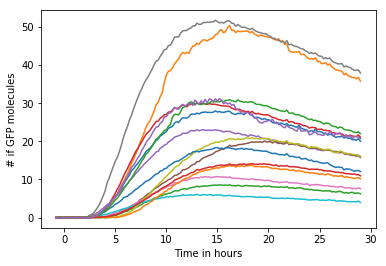

In [87]:
for data in egfp[:15]:
    plt.plot(time,data)
plt.xlabel("Time in hours")
plt.ylabel("# if GFP molecules")

In [100]:
def egfp_expression(t,ktm,delta,beta,t0):
    result = ktm/(delta-beta)*(1-np.exp(-(delta-beta)*(t-t0)))*np.exp(-beta*(t-t0))
    result[t<t0]=0
    return result

In [113]:
def threestage(t,t0,ktl,km,delta,beta,off=0):
    km=np.abs(km)
    ktl=np.abs(ktl)
    delta=np.abs(delta)
    beta=np.abs(beta)
    dmb = delta-beta
    bkm = beta + km
    dmbk = delta-bkm
    t0=np.abs(t0)
    dt=t-t0
    result = 1/dmb +km*np.exp(-dmb*dt)/dmb/dmbk-np.exp(-km*dt)/dmbk
    result = ktl*np.exp(-beta*dt)*result.clip(0)
    result[t<t0]=0
    return off+result
threestage_model = lm.Model(threestage)

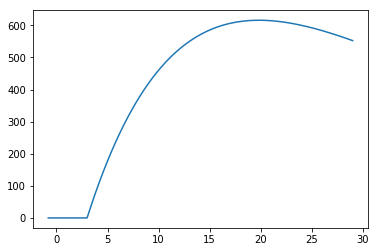

In [101]:
plt.plot(time,egfp_expression(time,100,0.05,0.07,3))

In [102]:
egfp_mod = lm.Model(egfp_expression)

In [118]:
data = egfp[11]

[[Model]]
    Model(egfp_expression)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 150
    # variables        = 4
    chi-square         = 17.2101228
    reduced chi-square = 0.11787755
    Akaike info crit   = -316.770633
    Bayesian info crit = -304.728091
[[Variables]]
    ktm:    3.23467476 +/- 0.03670434 (1.13%) (init = 3)
    delta:  0.08913456 +/- 6.07093736 (6810.98%) (init = 0.05)
    beta:   0.08918076 +/- 6.07217536 (6808.84%) (init = 0.07)
    t0:     6.89059023 +/- 0.04112195 (0.60%) (init = 6)
[[Correlations]] (unreported correlations are < 0.100)
    C(delta, beta) = -1.000
    C(ktm, t0)     =  0.675
    C(ktm, beta)   =  0.438
    C(ktm, delta)  = -0.437
    C(beta, t0)    =  0.188
    C(delta, t0)   = -0.188



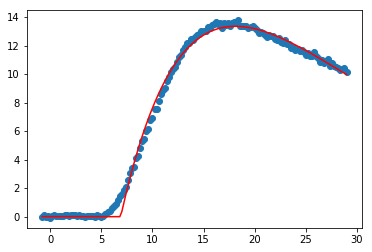

In [116]:
pars = egfp_mod.make_params()
pars['ktm'].set(value=3,vary=True)
pars['delta'].set(value=0.05,vary=True)
pars['beta'].set(value=0.07,vary=True)
pars['t0'].set(value=6,vary=True)

result = egfp_mod.fit(data,pars,t=time)

print(result.fit_report())

plt.plot(time,data,"o")
plt.plot(time, result.best_fit, 'r-')

[[Model]]
    Model(threestage)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 239
    # data points      = 150
    # variables        = 6
    chi-square         = 3.91300635
    reduced chi-square = 0.02717366
    Akaike info crit   = -534.949399
    Bayesian info crit = -516.885588
[[Variables]]
    t0:     5.62772147 +/- 0.04392492 (0.78%) (init = 5)
    ktl:    7.11911955 +/- 74.1273833 (1041.24%) (init = 3)
    km:    -0.26108058 +/- 2.71907737 (1041.47%) (init = 3)
    delta:  0.30380710 +/- 2.71778573 (894.58%) (init = 0.05)
    beta:   0.04276385 +/- 0.00127250 (2.98%) (init = 0.07)
    off:    0.10908091 +/- 0.02816080 (25.82%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(ktl, km)    =  1.000
    C(ktl, delta) =  1.000
    C(km, delta)  =  1.000
    C(t0, beta)   = -0.580
    C(t0, off)    =  0.398
    C(delta, off) =  0.123
    C(ktl, off)   =  0.123
    C(km, off)    =  0.122



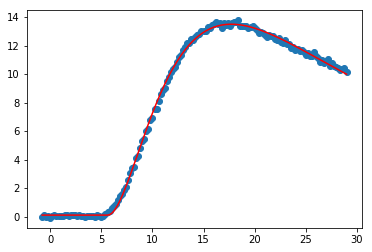

In [117]:
pars = threestage_model.make_params()
pars['km'].set(value=3,vary=True)
pars['ktl'].set(value=3,vary=True)
pars['delta'].set(value=0.05,vary=True)
pars['beta'].set(value=0.07,vary=True)
pars['t0'].set(value=5,vary=True)

result = threestage_model.fit(data,pars,t=time)

print(result.fit_report())

plt.plot(time,data,"o")
plt.plot(time, result.best_fit, 'r-')